In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook

In [2]:
import pdb
from scipy import integrate
from scipy import special
import numpy as np
from cmath import *
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from patch_geo_func import x_ep, y_ep
from sys import stdout
import warnings
from assign_attr import *
warnings.filterwarnings(action="error", category=np.ComplexWarning)

In [ ]:
LR_Pi_file = 'cortex_94-Ny/Ny-2-LR_Pi.bin'
pos_file = 'server_data/test_3d_pos.bin'
#pos_file = 'server_data/test_low_3d_pos.bin'
nblock = 5209 #32
blockSize = 1024

a = 0.635
b = 96.7
k = np.sqrt(140)*0.873145
ecc = 2.0 # must consistent with the corresponding variables in parameter.m and macro.ipynb
p0 = -np.pi/2
p1 = np.pi/2

grid = np.array([64,104])*2
nx = grid[0]
ny = grid[1]
W = x_ep(ecc,0,k,a,b)
d = (1+2/nx)*W/nx
x = np.linspace(-W/nx, W+W/nx, nx)
W = W+2*W/nx
H = d*ny
y = np.linspace(-H/2, H/2, ny)
mMap = macroMap(nx, ny, x, y, nblock, blockSize, LR_Pi_file, pos_file, a, b, k, ecc, p0, p1)
#mMap.assign_VF()

121341241

100.000%, grid (207,127)/(207,127)
412178


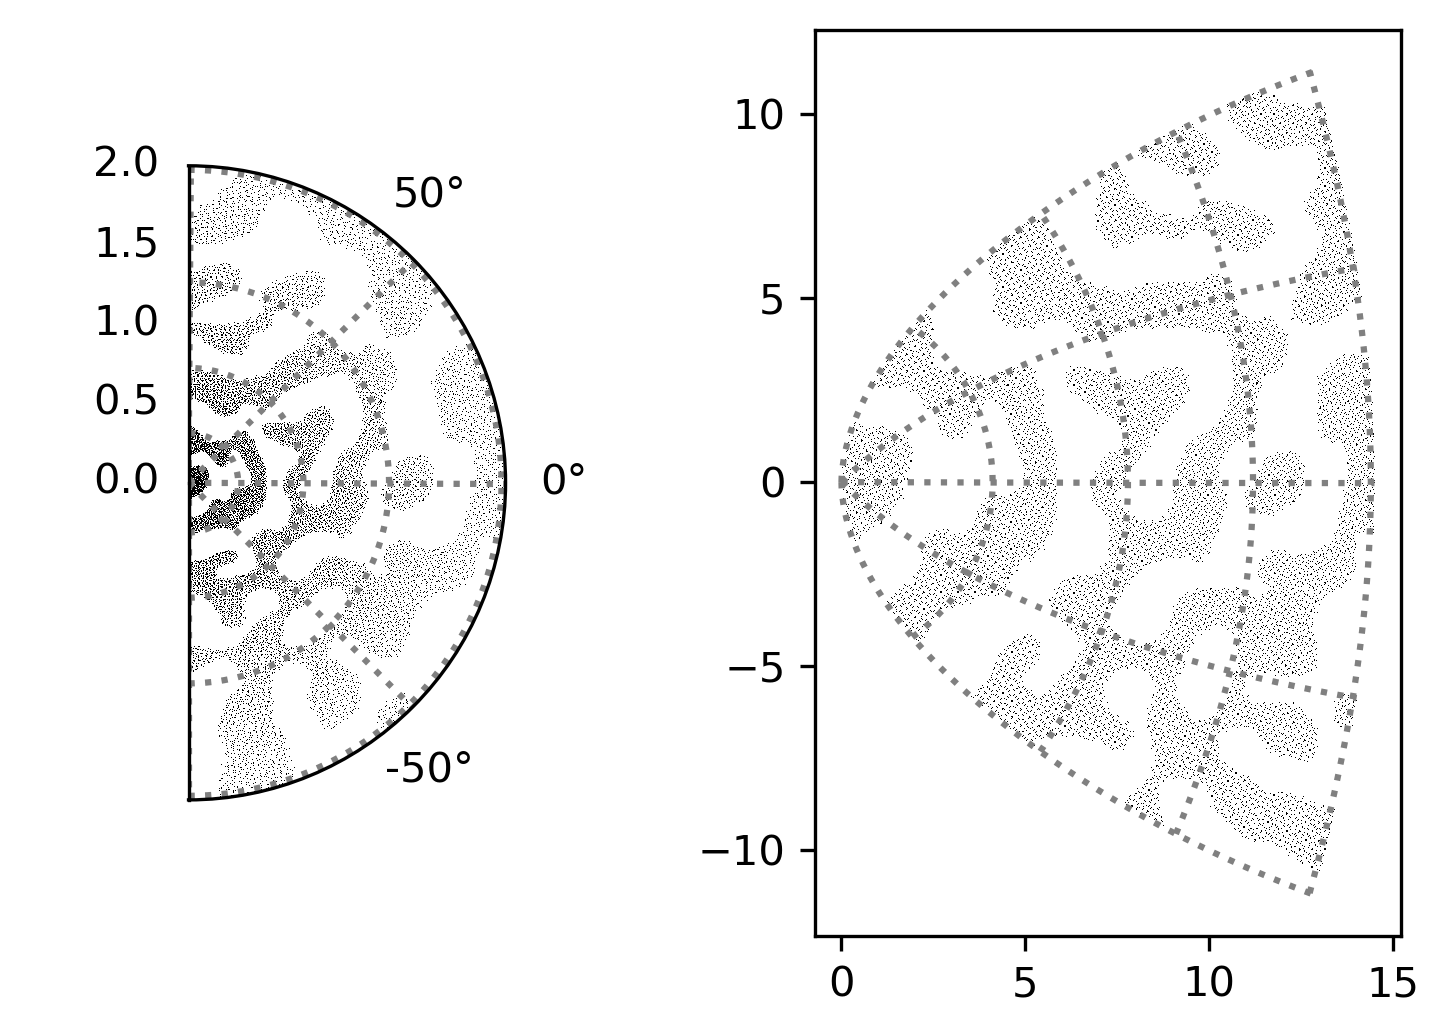

In [66]:
fig = plt.figure('macroMap',dpi=300)
ax1 = fig.add_subplot(121, projection='polar')
ax2 = fig.add_subplot(122)
#mMap.find_OD_in_pos()
mMap.find_pos_in_OD()
mMap.plot_map(ax1,ax2)
ax1.set_thetamin(p0/np.pi*180)
ax1.set_thetamax(p1/np.pi*180)
ax1.set_rmax(2.0)
ax1.set_rmin(0.0)
ax1.grid(False)
ax1.tick_params(labelleft=False, labelright=True,
               labeltop=False, labelbottom=True)
#ax1.set_yticks([0,0.5,1.00,1.50,2.00])
ax1.set_aspect('equal')
ax2.set_aspect('equal')

In [64]:
for i in range(mMap.networkSize):
    assert(l0[i] == l1[i])

In [ ]:
ODlabel = np.random.shuffle(plabel)